<a href="https://colab.research.google.com/github/suhanipal05/Object-Detection--YOLO/blob/main/Object_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DAY 1: Setup and Image Detection**

**YOLO - You Only Look Once**

In [ ]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 37.6 MB/s eta 0:00:00


In [ ]:
from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import files

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print("Uploaded:", file_name)

Saving PICT0272.JPG to PICT0272.JPG
Uploaded: PICT0272.JPG


In [ ]:
model  = YOLO('yolov8n.pt')

In [ ]:
results = model(file_name)
annotated = results[0].plot()


image 1/1 /content/PICT0272.JPG: 640x480 7 persons, 1 car, 76.6ms
Speed: 14.7ms preprocess, 76.6ms inference, 362.2ms postprocess per image at shape (1, 3, 640, 480)


(np.float64(-0.5), np.float64(2447.5), np.float64(3263.5), np.float64(-0.5))

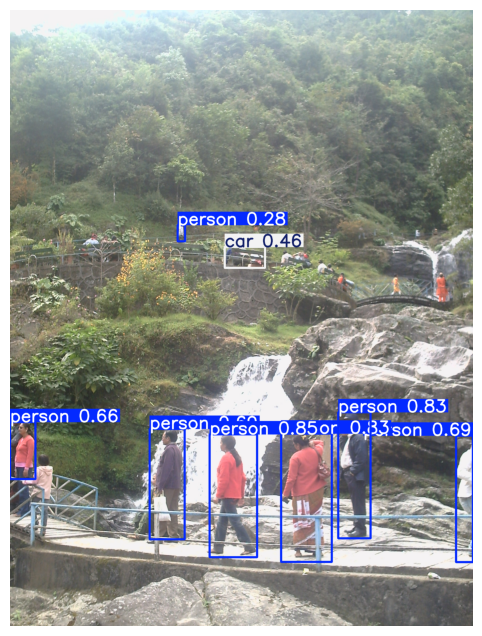

In [ ]:
plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB))
plt.axis('off')

**DAY 2**

In [ ]:
uploaded = files.upload()
video_path = list(uploaded.keys())[0]
print("Uploaded:",video_path)

Saving Untitled video - Made with Clipchamp.mp4 to Untitled video - Made with Clipchamp.mp4
Uploaded: Untitled video - Made with Clipchamp.mp4


In [ ]:
output_path = "output_detected.mp4"
cap = cv2.VideoCapture(video_path)
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS) or 25.0
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path,fourcc,fps,(width,height))

frame_count = 0
while True:
  ret,frame = cap.read()
  if not ret:
    break
  results = model(frame)
  annotated = results[0].plot()
  out.write(annotated)
  frame_count += 1
  if frame_count % 100 == 0:
    print(f"Proceed {frame_count} frames")
cap.release()
out.release()

print("Video Saved:",output_path)
files.download(output_path)


0: 384x640 (no detections), 85.1ms
Speed: 3.2ms preprocess, 85.1ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.0ms
Speed: 2.5ms preprocess, 12.0ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 10.1ms
Speed: 2.6ms preprocess, 10.1ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.2ms
Speed: 2.6ms preprocess, 9.2ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 8.3ms
Speed: 4.7ms preprocess, 8.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.6ms
Speed: 2.5ms preprocess, 9.6ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 12.9ms
Speed: 2.6ms preprocess, 12.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)

0: 384x640 (no detections), 9.6ms
Speed: 2.6ms preprocess, 9.6ms inference

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**DAY 3: Live Webcam Detection**

Captured: snapshot.jpg

image 1/1 /content/snapshot.jpg: 480x640 1 person, 45.4ms
Speed: 1.7ms preprocess, 45.4ms inference, 1.6ms postprocess per image at shape (1, 3, 480, 640)


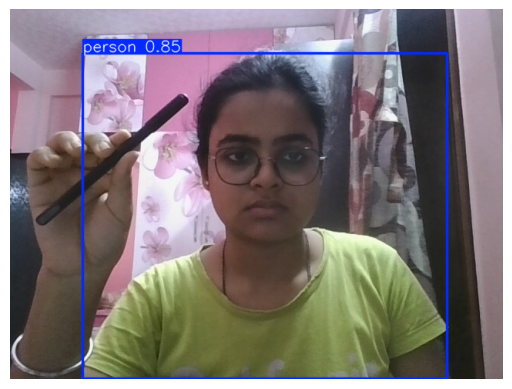

In [ ]:
!pip install -q ultralytics opencv-python-headless matplotlib pillow

from ultralytics import YOLO
import cv2
from matplotlib import pyplot as plt
from PIL import Image
from google.colab import output
from base64 import b64decode

model = YOLO('yolov8n.pt')

def take_photo(filename = 'snapshot.jpg'):
    js = """
   async function takePhoto() {
     const div = document.createElement('div');
     const capture = document.createElement('button');
     capture.textContent = 'Capture';
     div.appendChild(capture);
     document.body.appendChild(div);


     const video = document.createElement('video');
     video.style.display = 'block';
     const stream = await navigator.mediaDevices.getUserMedia({video: true});
     document.body.appendChild(video);
     video.srcObject = stream;
     await video.play();


     // Resize window
     google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);


     // Wait for Capture button
     await new Promise((resolve) => capture.onclick = resolve);


     const canvas = document.createElement('canvas');
     canvas.width = video.videoWidth;
     canvas.height = video.videoHeight;
     canvas.getContext('2d').drawImage(video, 0, 0);
     stream.getTracks().forEach(track => track.stop());
     const imgData = canvas.toDataURL('image/jpeg').split(',')[1];
     div.remove();
     return imgData;
   }
   takePhoto();
   """
    data = output.eval_js(js)
    with open(filename,'wb') as f:
      f.write(b64decode(data))
    return filename

filename = take_photo('snapshot.jpg')
print("Captured:",filename)

results = model(filename)
annotated = results[0].plot()

plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Saving PICT0015.JPG to PICT0015.JPG
Saving PICT0017.JPG to PICT0017.JPG
Processing PICT0015.JPG...

image 1/1 /content/PICT0015.JPG: 480x640 3 persons, 3 chairs, 6.7ms
Speed: 3.0ms preprocess, 6.7ms inference, 3.8ms postprocess per image at shape (1, 3, 480, 640)


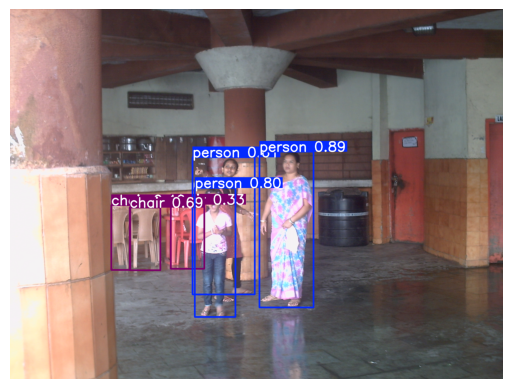

Processing PICT0017.JPG...

image 1/1 /content/PICT0017.JPG: 480x640 6 persons, 1 dog, 9.6ms
Speed: 6.6ms preprocess, 9.6ms inference, 5.4ms postprocess per image at shape (1, 3, 480, 640)


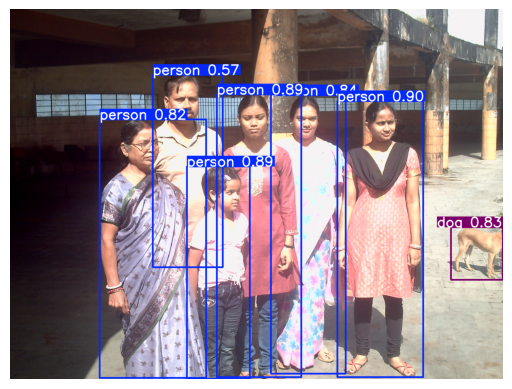

In [ ]:
from google.colab import files
import glob
import cv2
import matplotlib.pyplot as plt

uploaded = files.upload()

for img_name in uploaded.keys():
  print(f"Processing {img_name}...")
  results = model(img_name)
  annotated = results[0].plot()
  plt.imshow(cv2.cvtColor(annotated,cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()

**DAY 4 : Mini YOLO Training**

In [2]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 68.3 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
model = YOLO('yolov8n.pt')

In [5]:
!curl -L "https://github.com/ultralytics/assets/releases/download/v0.0.0/coco128.zip" -o coco128.zip
!unzip -q coco128.zip -d dataset
!ls dataset/coco128

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  30.0M      0 --:--:-- --:--:-- --:--:-- 30.0M
replace dataset/coco128/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
images	labels	LICENSE  README.txt


In [6]:
%%writefile dataset/coco128.yaml
path: dataset/coco128
train: images/train2017
val: images/train2017

nc: 80
names:
  - person
  - bicycle
  - car
  - motorcycle
  - airplane
  - bus
  - train
  - truck
  - boat
  - traffic light
  - fire hydrant
  - stop sign
  - parking meter
  - bench
  - bird
  - cat
  - dog
  - horse
  - sheep
  - cow
  - elephant
  - bear
  - zebra
  - giraffe
  - backpack
  - umbrella
  - handbag
  - tie
  - suitcase
  - frisbee
  - skis
  - snowboard
  - sports ball
  - kite
  - baseball bat
  - baseball glove
  - skateboard
  - surfboard
  - tennis racket
  - bottle
  - wine glass
  - cup
  - fork
  - knife
  - spoon
  - bowl
  - banana
  - apple
  - sandwich
  - orange
  - broccoli
  - carrot
  - hot dog
  - pizza
  - donut
  - cake
  - chair
  - couch
  - potted plant
  - bed
  - dining table
  - toilet
  - tv
  - laptop
  - mouse
  - remote
  - keyboard
  - cell phone
  - microwave
  - oven
  - toaster
  - sink
  - refrigerator
  - book
  - clock
  - vase
  - scissors
  - teddy bear
  - hair drier
  - toothbrush

Writing dataset/coco128.yaml


In [7]:
model = YOLO('yolov8n.pt')

model.train(
    data="/content/dataset/coco128.yaml",
    epochs=10,
    imgsz=640,
    project="YOLO_Training",
    name="yolov8n_custom"
)

Ultralytics 8.3.199 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset/coco128.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolov8n_custom, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=Tr

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 13, 14, 15, 16, 17, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c7a194a6270>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,


image 1/1 /content/dataset/coco128/images/train2017/000000000643.jpg: 480x640 1 bottle, 1 bowl, 1 tv, 1 remote, 4 books, 3 teddy bears, 46.1ms
Speed: 2.4ms preprocess, 46.1ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
Results saved to /content/YOLO_Training/yolov8n_custom2


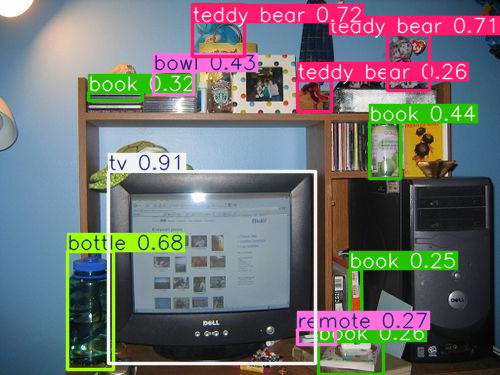

In [8]:
results=model.predict("/content/dataset/coco128/images/train2017/000000000643.jpg", save=True)
results[0].show()

**DAY 5: Build a simple Streamlit App**

In [1]:
!pip install streamlit==1.38.0 ultralytics==8.3.0 pyngrok==7.1.6 opencv-python-headless pillow pandas

In [2]:
%%writefile app_streamlit.py
import streamlit as st
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2, tempfile, os, glob
import pandas as pd
from pathlib import Path

st.set_page_config(page_title="Object Detection(DevTown)", layout='wide')
background_url = "https://i.ibb.co/FqVqvBBN/web-back.png"

st.markdown(
   f"""
   <style>
   .stApp {{
       background: url("{background_url}") no-repeat center center fixed;
       background-size: cover;
   }}
   /* Sidebar styling */
   section[data-testid="stSidebar"] {{
       background: rgba(0, 0, 0, 0.3);
       backdrop-filter: blur(10px);
       border-radius: 12px;
       padding: 10px;
   }}
   /* File uploader styling */
   div[data-testid="stFileUploader"] {{
       background: rgba(0, 0, 0, 0.3);
       backdrop-filter: blur(10px);
       border-radius: 12px;
       padding: 15px;
   }}
   /* DataFrame styling */
   .stDataFrame {{
       background: rgba(255, 255, 255, 0.85);
       border-radius: 12px;
       padding: 10px;
       box-shadow: 0 4px 10px rgba(0,0,0,0.3);
   }}
   /* Dark text */
   h1, h2, h3, h4, h5, h6, p, label, span, div {{
       color: #fc5800 !important;
       font-weight: 500;
   }}
   </style>
   """,
   unsafe_allow_html=True
)

st.title("Object Detection (DevTown)")


uploaded_weights = st.sidebar.file_uploader("Upload custom .pt weights (optional)", type=["pt"])
conf = st.sidebar.slider("Confidence threshold", 0.0, 1.0, 0.25, 0.01)
img_size = st.sidebar.selectbox("Inference image size (px)", [320, 416, 640, 1280], index=2)


@st.cache_resource
def load_model(weights_path="yolov8n.pt"):
   return YOLO(weights_path)


def save_uploaded_file(uploaded_file, suffix=""):
   suffix = suffix if suffix else Path(uploaded_file.name).suffix
   tf = tempfile.NamedTemporaryFile(delete=False, suffix=suffix)
   tf.write(uploaded_file.getbuffer())
   tf.flush()
   return tf.name


def annotate_and_table(results, model):
   res = results[0]
   try:
       plotted = res.plot()
       annotated = cv2.cvtColor(plotted, cv2.COLOR_BGR2RGB)
   except Exception:
       annotated = res.orig_img if hasattr(res, "orig_img") else None


   detections = []
   try:
       boxes = res.boxes
       if boxes is not None and len(boxes) > 0:
           for c, cf, box in zip(boxes.cls.cpu().numpy(), boxes.conf.cpu().numpy(), boxes.xyxy.cpu().numpy()):
               name = model.names[int(c)]
               detections.append({"class": name, "conf": float(cf), "bbox": [float(x) for x in box]})
   except:
       detections = []


   return annotated, pd.DataFrame(detections)


weights_to_load = "yolov8n.pt"
if uploaded_weights:
   weights_to_load = save_uploaded_file(uploaded_weights, suffix=".pt")
   st.sidebar.success("Using uploaded weights")


model = load_model(weights_to_load)


mode = st.radio("Select input", ["Image upload", "Video upload"])


if mode == "Image upload":
   uploaded = st.file_uploader("Upload image", type=["jpg","jpeg","png"])
   if uploaded:
       img = Image.open(uploaded).convert("RGB")
       st.image(img, caption="Input image")
       results = model.predict(np.array(img), conf=conf, imgsz=img_size)
       annotated, df = annotate_and_table(results, model)
       if annotated is not None:
           st.image(annotated, caption="Annotated")
       if not df.empty:
           st.dataframe(df)


elif mode == "Video upload":
   uploaded_vid = st.file_uploader("Upload video", type=["mp4","mov","avi","mkv"])
   if uploaded_vid:
       tmp = save_uploaded_file(uploaded_vid)
       st.video(tmp)
       project_dir = tempfile.mkdtemp()
       results = model.predict(source=tmp, conf=conf, imgsz=img_size, project=project_dir, name="run", save=True)
       try:
           out_dir = str(results[0].save_dir)
           vids = glob.glob(os.path.join(out_dir, "*"))
           vids = [v for v in vids if Path(v).suffix.lower() in [".mp4",".avi",".mov",".mkv"]]
           if vids:
               st.success("Annotated video")
               st.video(vids[0])
       except:
           st.warning("Could not display annotated video")


Writing app_streamlit.py


In [ ]:
from pyngrok import ngrok

NGROK_AUTH_TOKEN = "32hBwO8dAF8ZsFAEWPGdQROf0rg_3bVSdvovz6SYofJbawwBp" #unique for everyone
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

public_url = ngrok.connect(8501)
print("Public URL: ", public_url)

!streamlit run app_streamlit.py --server.port 8501 &

import time
while True:
  time.sleep(60)

Public URL:  NgrokTunnel: "https://4f586199783b.ngrok-free.app" -> "http://localhost:8501"



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.139.33.92:8501

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
100% 6.25M/6.25M [00:00<00:00, 71.8MB/s]
2025-09-14 19:06:59.137 Examining the path of torch.classes raised: Tried to instantiate class '__path__._path', but it does not exist! Ensure that it is registered via torch::class_

0: 448x640 2 persons, 1 bus, 1 bird, 2 horses, 364.5ms
Speed: 5.4ms preprocess, 364.5ms inference, 38.2ms postprocess per image at shape (1, 3, 448, 640)
2025-09-14 19:13:27.014 Examining the path o